### Import libraries

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import dataset

In [2]:
#Importing the dataset
df = pd.read_csv('adult.csv')

### Exploratory data analysis

In [3]:
#Getting the shape of the dataset
df.shape

(48842, 15)

In [4]:
#Getting the first 5 rows of the dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
#Getting the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Explore categorical variables

In [6]:
#Finding the categorical columns in the dataset
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [7]:
#viewing the categorical columns
df[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


Summary of categorical variables
* There are 9 categorical variables.
* The categorical columns are given by: workclass, eductaion, marital-status, occupation, relationship, race, gender, native-country, income.
* income is the target variable

In [8]:
#Checking for missing values in categorical columns
df[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
income            0
dtype: int64

In [9]:
#Frequency counts of values in categorical columns
for count in categorical:
    print(df[count].value_counts())
    print('\n')

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64




occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64


race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64


gender
Male      32650
Female    16192
Name: count, dtype: int64


native-country
United-States                 43832
Mexico                          951
?                               857
Philippines            

In [10]:
#Frequency distribution of categorical columns
for count in categorical:
    print(df[count].value_counts(normalize=True))
    print('\n')

workclass
Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: proportion, dtype: float64


education
HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: proportion, dtype: float64


marital-status
Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000

Now, we can see that there are several variables like workclass, occupation and native_country which contain missing values. Generally, the missing values are coded as NaN and python will detect them with the usual command of df.isnull().sum().

But, in this case the missing values are coded as ?. Python fail to detect these as missing values because it do not consider ? as missing values. So, I have to replace ? with NaN so that Python can detect these missing values.

I will explore these variables and replace ? with NaN.

In [11]:
#Checking for unique values in workclass column
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
#Checking frequency of values in workclass column
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

We can see that there are 2799 values encoded as ? in workclass variable. I will replace these ? with NaN.

In [13]:
#Replacing '?' with NaN in workclass column
df.replace({'workclass': {'?': np.nan}}, inplace=True)

In [14]:
#Checking the frequency of values in workclass column again
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Now, we can see that there are no values encoded as ? in the workclass variable.

I will adopt similar approach with occupation and native_country column.

In [15]:
#Checking for unique values in occupation column
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [16]:
#Checking the frequency of values in occupation column
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

We can see that there are 2809 values encoded as ? in occupation variable. I will replace these ? with NaN.

In [17]:
#Replacing '?' with NaN in occupation column
df.replace({'occupation': {'?': np.nan}}, inplace=True)

In [18]:
#Checking the frequency of values in occupation column again
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [19]:
#Checking for unique values in native-country column
df['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [20]:
#Checking the frequency of values in native-country column
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

We can see that there are 857 values encoded as ? in native-country variable. I will replace these ? with NaN

In [21]:
#Replacing '?' with NaN in native-country column
df.replace({'native-country': {'?': np.nan}}, inplace=True)

In [22]:
#Checking the frequency of values in native-country column again
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador      

In [23]:
#Checking for missing values in categorical columns again
df[categorical].isnull().sum()

workclass         2799
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
native-country     857
income               0
dtype: int64

Now, we can see that workclass, occupation and native_country variable contains missing values.

#### Number of labels: cardinality
The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [24]:
#Checking for cardinality in categorical columns
for count in categorical:
    print(count, df[count].nunique(), 'labels')

workclass 8 labels
education 16 labels
marital-status 7 labels
occupation 14 labels
relationship 6 labels
race 5 labels
gender 2 labels
native-country 41 labels
income 2 labels


We can see that native_country column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

### Explore Numerical Variables

In [25]:
#Checking for numeric columns in the dataset
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [26]:
#Viewing the numeric columns
df[numerical].head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


Summary of numerical variables
* There are 6 numerical variables.
* These are given by age, fnlwgt, education_num, capital_gain, capital_loss and hours_per_week.
* All of the numerical variables are of discrete data type.

Exploring problems within numerical variables

In [27]:
#Checking for missing values in numerical columns
df[numerical].isnull().sum()

age                0
fnlwgt             0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64

We can see that all the 6 numerical variables do not contain missing values.

### Declaring feature vector and target variable

In [28]:
X = df.drop(columns=['income'])
y = df['income']

### Splitting data into separate training and test set

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# check the shape of the X_train and X_test
X_train.shape, X_test.shape

((39073, 14), (9769, 14))

### Feature Engineering

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [31]:
#Check data types in X_train
X_train.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
dtype: object

In [32]:
#Displaying categorical columns in X_train
categorical_X_train = X_train.select_dtypes(include=['object']).columns.tolist()
categorical_X_train

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [33]:
#Displaying the numeric columns in X_train
numeric_X_train = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_X_train

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [34]:
#Print the mean of missing values in categorical columns in X_train
X_train[categorical_X_train].isnull().mean()

workclass         0.057943
education         0.000000
marital-status    0.000000
occupation        0.058173
relationship      0.000000
race              0.000000
gender            0.000000
native-country    0.017173
dtype: float64

In [35]:
# Print categorical columns in X_train with missing values
for col in categorical_X_train:
    if X_train[col].isnull().sum() > 0:
        print(col, X_train[col].isnull().sum(), 'missing values')

workclass 2264 missing values
occupation 2273 missing values
native-country 671 missing values


In [36]:
#Printing the mean of missing values in categorical columns in X_train
for col in categorical_X_train:
    if X_train[col].isnull().mean() > 0:
        print(col, X_train[col].isnull().mean())

workclass 0.05794282496864843
occupation 0.05817316305377115
native-country 0.01717298390192716


In [37]:
#imputing missing values in categorical columns with most frequent value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_X_train] = imputer.fit_transform(X_train[categorical_X_train])
X_train[categorical_X_train].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
dtype: int64

In [38]:
#Checking for missing values in categorical columns in X_test
X_test[categorical_X_train].isnull().sum()

workclass         535
education           0
marital-status      0
occupation        536
relationship        0
race                0
gender              0
native-country    186
dtype: int64

In [39]:
#imputing missing values in categorical columns in X_test with most frequent value
X_test[categorical_X_train] = imputer.transform(X_test[categorical_X_train])
X_test[categorical_X_train].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
dtype: int64

In [40]:
#Checking for missing values in categorical columns in X_train again
X_train[categorical_X_train].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
dtype: int64

In [41]:
#Checking for missing values in categorical columns in X_test again
X_test[categorical_X_train].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
dtype: int64

We can see that there are no missing values in X_train and X_test.

##### Encode categorical variables

In [42]:
#Checking for categorical values in X_train
X_train[categorical_X_train].head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
37193,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
31093,Self-emp-not-inc,10th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
33814,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
14500,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
23399,Private,Assoc-voc,Never-married,Transport-moving,Not-in-family,White,Male,United-States


In [43]:
#Importing category_encoders
import category_encoders as ce

#Creating a target encoder object
encoder = ce.OneHotEncoder(cols=categorical_X_train, use_cat_names=True)

#Fitting the encoder on X_train
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [44]:
X_train.head()

,age,workclass_Private,workclass_Self-emp-not-inc,workclass_Local-gov,workclass_Federal-gov,workclass_Self-emp-inc,workclass_State-gov,workclass_Without-pay,workclass_Never-worked,fnlwgt,...,native-country_Vietnam,native-country_Haiti,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Cambodia,native-country_Greece,native-country_Nicaragua,native-country_Thailand,native-country_Laos,native-country_Holand-Netherlands
37193,42,1,0,0,0,0,0,0,0,145175,...,0,0,0,0,0,0,0,0,0,0
31093,52,0,1,0,0,0,0,0,0,175029,...,0,0,0,0,0,0,0,0,0,0
33814,34,0,0,1,0,0,0,0,0,172664,...,0,0,0,0,0,0,0,0,0,0
14500,28,1,0,0,0,0,0,0,0,125791,...,0,0,0,0,0,0,0,0,0,0
23399,46,1,0,0,0,0,0,0,0,28419,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X_train.shape

(39073, 105)

In [47]:
X_test.head()

,age,workclass_Private,workclass_Self-emp-not-inc,workclass_Local-gov,workclass_Federal-gov,workclass_Self-emp-inc,workclass_State-gov,workclass_Without-pay,workclass_Never-worked,fnlwgt,...,native-country_Vietnam,native-country_Haiti,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Cambodia,native-country_Greece,native-country_Nicaragua,native-country_Thailand,native-country_Laos,native-country_Holand-Netherlands
7762,56,1,0,0,0,0,0,0,0,33115,...,0,0,0,0,0,0,0,0,0,0
23881,25,1,0,0,0,0,0,0,0,112847,...,0,0,0,0,0,0,0,0,0,0
30507,43,1,0,0,0,0,0,0,0,170525,...,0,0,0,0,0,0,0,0,0,0
28911,32,1,0,0,0,0,0,0,0,186788,...,0,0,0,0,0,0,0,0,0,0
19484,39,1,0,0,0,0,0,0,0,277886,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X_test.shape

(9769, 105)

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.

### Feature Scaling

In [48]:
cols = X_train.columns

In [49]:
#importing RobustScaler
from sklearn.preprocessing import RobustScaler

#Creating a RobustScaler object
scaler = RobustScaler()

#Fitting the scaler on X_train
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
#Converting the scaled data back to a DataFrame
X_train = pd.DataFrame(X_train, columns=cols)

In [51]:
#Converting the scaled data back to a DataFrame
X_test = pd.DataFrame(X_test, columns=cols)

In [52]:
#Checking the shape of the scaled data
X_train.shape, X_test.shape

((39073, 105), (9769, 105))

In [53]:
#Checking the first 5 rows of the scaled data
X_train.head()

,age,workclass_Private,workclass_Self-emp-not-inc,workclass_Local-gov,workclass_Federal-gov,workclass_Self-emp-inc,workclass_State-gov,workclass_Without-pay,workclass_Never-worked,fnlwgt,...,native-country_Vietnam,native-country_Haiti,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Cambodia,native-country_Greece,native-country_Nicaragua,native-country_Thailand,native-country_Laos,native-country_Holand-Netherlands
0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.273095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.75,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.024521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.15,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.044213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.434493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.245244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now have X_train dataset ready to be fed into the Gaussian Naive Bayes classifier.

### Model training

In [54]:
#train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

#Creating a Gaussian Naive Bayes classifier
gnb = GaussianNB()

#Fitting the classifier on the training set
gnb.fit(X_train, y_train)

GaussianNB()

### Predicting the results

In [55]:
y_pred = gnb.predict(X_test)
y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '>50K'],
      shape=(9769,), dtype='<U5')

In [56]:
#Checking the shape of the predicted values
y_pred.shape

(9769,)

### Checking accuracy score

In [57]:
#Checking accuracy score of the model
from sklearn.metrics import accuracy_score

print('Model accuracy score:', accuracy_score(y_test, y_pred))

Model accuracy score: 0.8079639676527792


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

#### Comparing the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [58]:
#Comparing the train-set and test-set accuracy scores
y_pred_train = gnb.predict(X_train)
y_pred_train

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      shape=(39073,), dtype='<U5')

In [59]:
print('Train-set accuracy score:', accuracy_score(y_train, y_pred_train))

Train-set accuracy score: 0.8011926394185243


#### Checking for overfitting and underfitting

In [60]:
#print the scores on the training and test sets
print('Train-set accuracy score:', accuracy_score(y_train, y_pred_train))
print('Test-set accuracy score:', accuracy_score(y_test, y_pred))

Train-set accuracy score: 0.8011926394185243
Test-set accuracy score: 0.8079639676527792


The training-set accuracy score is 0.8011926394185243 while the test-set accuracy to be 0.8079639676527792. These two values are quite comparable. So, there is no sign of overfitting.



#### Comparing model accuracy with null accuracy

So, the model accuracy is 0.8083. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [61]:
# Checking class distribution in the test set
y_test.value_counts()

income
<=50K    7479
>50K     2290
Name: count, dtype: int64

We can see that the occurences of most frequent class is 7479. So, we can calculate null accuracy by dividing 7479 by total number of occurences.

In [65]:
#check null accuracy score
null_accuracy = y_test.value_counts(normalize=True).max()
print('Null accuracy score:', null_accuracy)

Null accuracy score: 0.7655850138192241


We can see that our model accuracy score is 0.8079639676527792 but null accuracy score is 0.7655850138192241. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called **Confusion matrix** that comes to our rescue.

### Confusion matrix

A **confusion matrix** is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**

In [74]:
#print the confusion matrix and slice it into 4 quadrants
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix:\n\n', cm)
print('\nTrue Positives(TP):', cm[0, 0])
print('\nTrue Negatives(TN):', cm[1, 1])
print('\nFalse Positives(FP):', cm[0, 1])
print('\nFalse Negatives(FN):', cm[1, 0])


Confusion matrix:

 [[6025 1454]
 [ 422 1868]]

True Positives(TP): 6025

True Negatives(TN): 1868

False Positives(FP): 1454

False Negatives(FN): 422


The confusion matrix shows 6025 + 1868 = 7893 correct predictions and 1454 + 422 = 1876 incorrect predictions.

In this case, we have

* True Positives (Actual Positive:1 and Predict Positive:1) - 6025
* True Negatives (Actual Negative:0 and Predict Negative:0) - 1868 
* False Positives (Actual Negative:0 but Predict Positive:1) - 1454 (Type I error)
* False Negatives (Actual Positive:1 but Predict Negative:0) - 422 (Type II error)

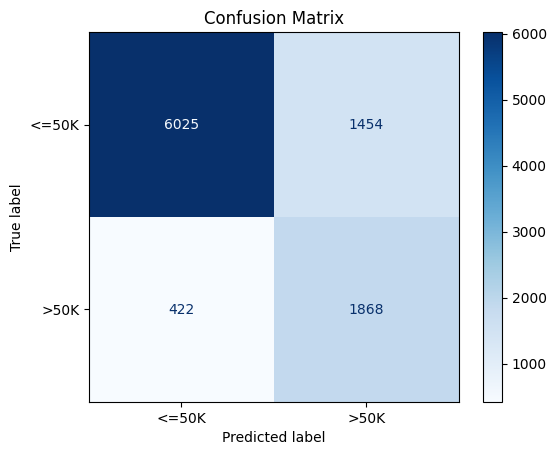

In [75]:
#visualizing the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Classification metrices

Classification Report
**Classification report** is another way to evaluate the classification model performance. It displays the **precision, recall, f1** and **support** scores for the model. I have described these terms in later.

In [76]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=gnb.classes_))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.87      7479
        >50K       0.56      0.82      0.67      2290

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.85      0.81      0.82      9769



##### Classification accuracy

In [77]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [78]:
#Print classification accuracy
classification_accuracy = (TP + TN) / (TP + TN + FP + FN)
print('Classification accuracy:', classification_accuracy)

Classification accuracy: 0.8079639676527792


##### Classification error

In [79]:
# print classification error
classification_error = (FP + FN) / (TP + TN + FP + FN)

print('Classification error:', classification_error)

Classification error: 0.1920360323472208


##### Precision
**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).



In [80]:
# print precision score
precision = TP / (TP + FP)

print('Precision score:', precision)

Precision score: 0.8055889824842893


##### Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.

**Recall** identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [81]:
# print recall score or sensitivity
recall = TP / (TP + FN)
print('Recall score or Sensitivity:', recall)

Recall score or Sensitivity: 0.9345431983868466


#### True Positive Rate
**True Positive Rate** is synonymous with **Recall**.

In [82]:
true_positive_rate = recall
print('True Positive Rate:', true_positive_rate)

True Positive Rate: 0.9345431983868466


#### False Positive Rate

In [83]:
false_positive_rate = FP / (FP + TN)
print('False Positive Rate:', false_positive_rate)

False Positive Rate: 0.4376881396748946


#### Specificity

In [84]:
specificity = TN / (TN + FP)
print('Specificity:', specificity)

Specificity: 0.5623118603251054


#### f1-score
**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

#### Support
**Support** is the actual number of occurrences of the class in our dataset.